### 📦 Step 1: Import Library
Mengimpor berbagai library penting untuk data processing, visualisasi, dan machine learning.  
`xgboost` dan `lasso` dipakai sebagai model regresi utama.

In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.linear_model import Lasso
import warnings

### 📄 Step 2: Load Data
Membaca file CSV dan menampilkan 5 baris pertama dataset untuk mengecek struktur awal data.

In [362]:
df = pd.read_csv('Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### 📋 Step 3: Info Awal Dataset
Mengecek tipe data, statistik deskriptif, dan jumlah duplikat dalam dataset.

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [364]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


### 🧹 Step 4: Hapus Duplikat & Cek Missing Values
Menghapus baris duplikat dan mengecek nilai yang hilang (NaN).

In [365]:
df.duplicated().sum()

np.int64(50)

In [366]:
df.drop_duplicates(inplace = True)

In [367]:
df.isnull().sum()

,0
Age,1
Gender,1
Education Level,1
Job Title,1
Years of Experience,1
Salary,1


### 🧼 Step 5: Hapus Missing Values
Drop semua baris yang mengandung nilai kosong untuk memastikan kualitas data.

In [369]:
df = df.dropna()

In [370]:
print(df.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


### 🔢 Step 6: Konversi ke Integer
Mengubah tipe data `Age` dan `Years of Experience` menjadi integer.

In [371]:
df['Age'] = df['Age'].astype(int)
df['Years of Experience'] = df['Years of Experience'].astype(int)
df.sample(5)

<ipython-input-371-1447549833>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)
<ipython-input-371-1447549833>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years of Experience'] = df['Years of Experience'].astype(int)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
141,41,Female,Master's,Senior Marketing Manager,13,110000.0
109,28,Male,Bachelor's,Customer Success Manager,2,40000.0
241,29,Male,Bachelor's,Junior Business Analyst,1,40000.0
196,41,Female,Bachelor's,Senior Marketing Coordinator,11,90000.0
87,40,Female,Bachelor's,HR Generalist,15,80000.0


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    int64  
 1   Gender               324 non-null    object 
 2   Education Level      324 non-null    object 
 3   Job Title            324 non-null    object 
 4   Years of Experience  324 non-null    int64  
 5   Salary               324 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 17.7+ KB


### 📊 Step 7: Fungsi Visualisasi
Fungsi untuk menampilkan distribusi data numerik maupun kategorikal, lengkap dengan histogram, boxplot, pie chart, dan bar chart.


In [374]:
def visualize_column(column_name, data):
    plt.figure(figsize=(12, 5))

    if pd.api.types.is_numeric_dtype(data[column_name]):
        # Distribusi untuk data numerik
        plt.subplot(1, 2, 1)
        sns.histplot(data[column_name], kde=True, color='skyblue')
        plt.title(f'Distribution of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Count')

        # Boxplot untuk lihat outlier
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[column_name], color='salmon')
        plt.title(f'Boxplot of {column_name}')
        plt.xlabel(column_name)

    else:
        # Hitung frekuensi
        values = data[column_name].value_counts().values
        labels = data[column_name].value_counts().index
        colors = sns.color_palette('RdBu', len(labels))

        # Pie chart
        plt.subplot(1, 2, 1)
        plt.title(f'Distribution of {column_name}')
        plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)

        # Bar chart
        plt.subplot(1, 2, 2)
        sns.countplot(x=column_name, data=data, palette='RdBu')
        plt.title(f'Count of {column_name}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=30)

    plt.tight_layout()
    plt.show()

### 🔍 Step 8: Visualisasi Kolom Numerik
Menampilkan distribusi dan outlier untuk kolom usia dan pengalaman kerja.

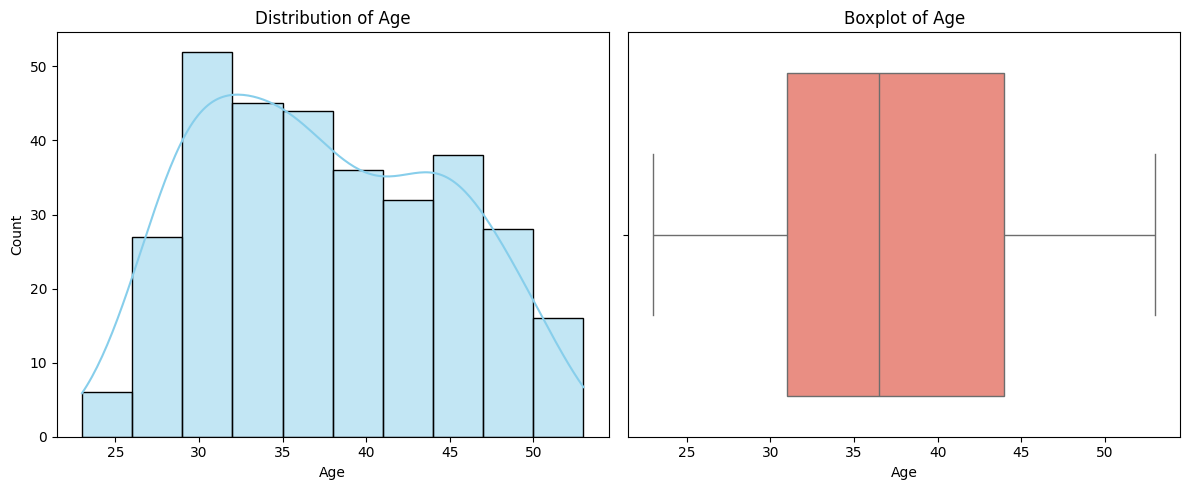

In [375]:
visualize_column('Age', df)

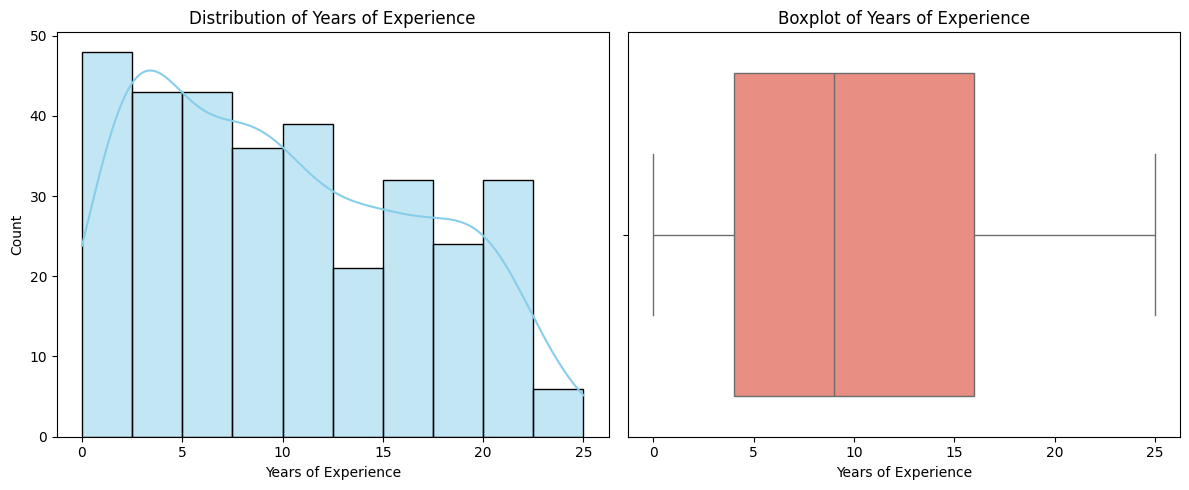

In [376]:
visualize_column('Years of Experience', df)

### ❗ Step 9: Hapus Outlier
Menghapus outlier berdasarkan IQR (interquartile range) dari semua kolom numerikal.

In [377]:
numeric_cols = df.select_dtypes(include='number').columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
filter_outliers = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[filter_outliers]
df.shape

(324, 6)

### 🧠 Step 10: Definisi Fitur
Mendefinisikan fitur numerikal dan kategorikal yang akan digunakan dalam analisis dan modeling.


In [378]:
numerical_features = ['Age','Years of Experience','Salary']
categorical_features = ['Gender', 'Education Level', 'Job Title']

### 📈 Step 11: Eksplorasi Kategorikal
Menampilkan distribusi jumlah sampel dan persentasenya untuk fitur kategorikal.


        jumlah sampel  persentase
Gender                           
Male              170        52.5
Female            154        47.5


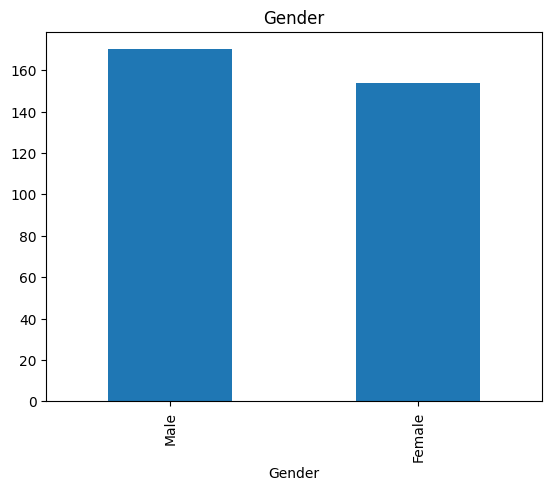

In [379]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

                 jumlah sampel  persentase
Education Level                           
Bachelor's                 191        59.0
Master's                    91        28.1
PhD                         42        13.0


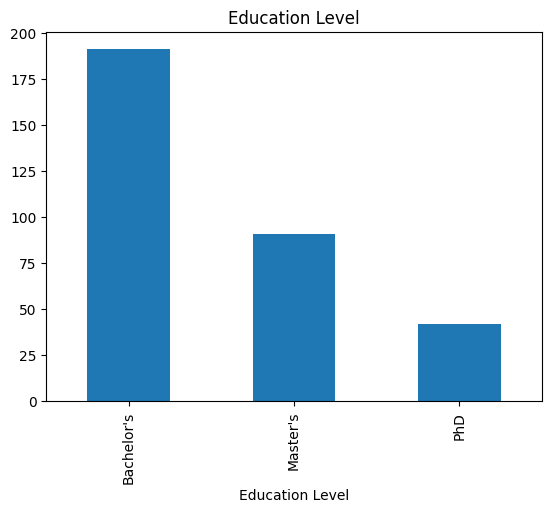

In [380]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

                              jumlah sampel  persentase
Job Title                                              
Account Manager                         NaN         0.3
Accountant                              NaN         0.3
Administrative Assistant                NaN         0.6
Business Analyst                        NaN         0.6
Business Development Manager            NaN         0.3
...                                     ...         ...
UX Designer                             NaN         0.3
UX Researcher                           NaN         0.3
VP of Finance                           NaN         0.3
VP of Operations                        NaN         0.3
Web Developer                           NaN         0.3

[174 rows x 2 columns]


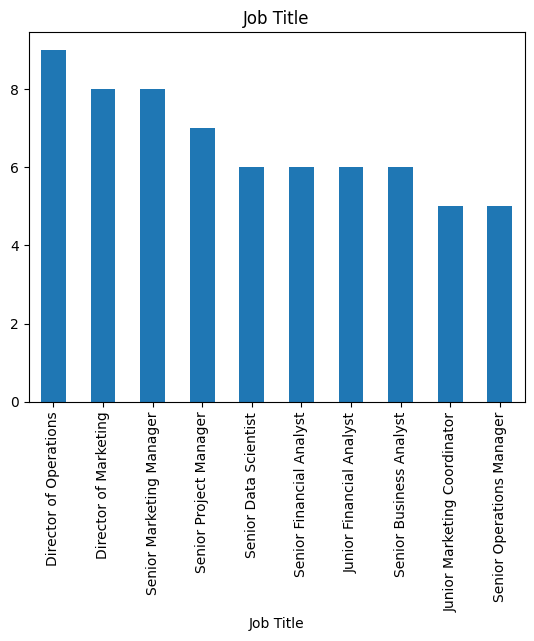

In [381]:
feature = categorical_features[2]
count = df[feature].value_counts().head(10)
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

### 🖼️ Step 12: Histogram
Histogram semua kolom numerikal untuk melihat distribusi data dengan lebih luas.

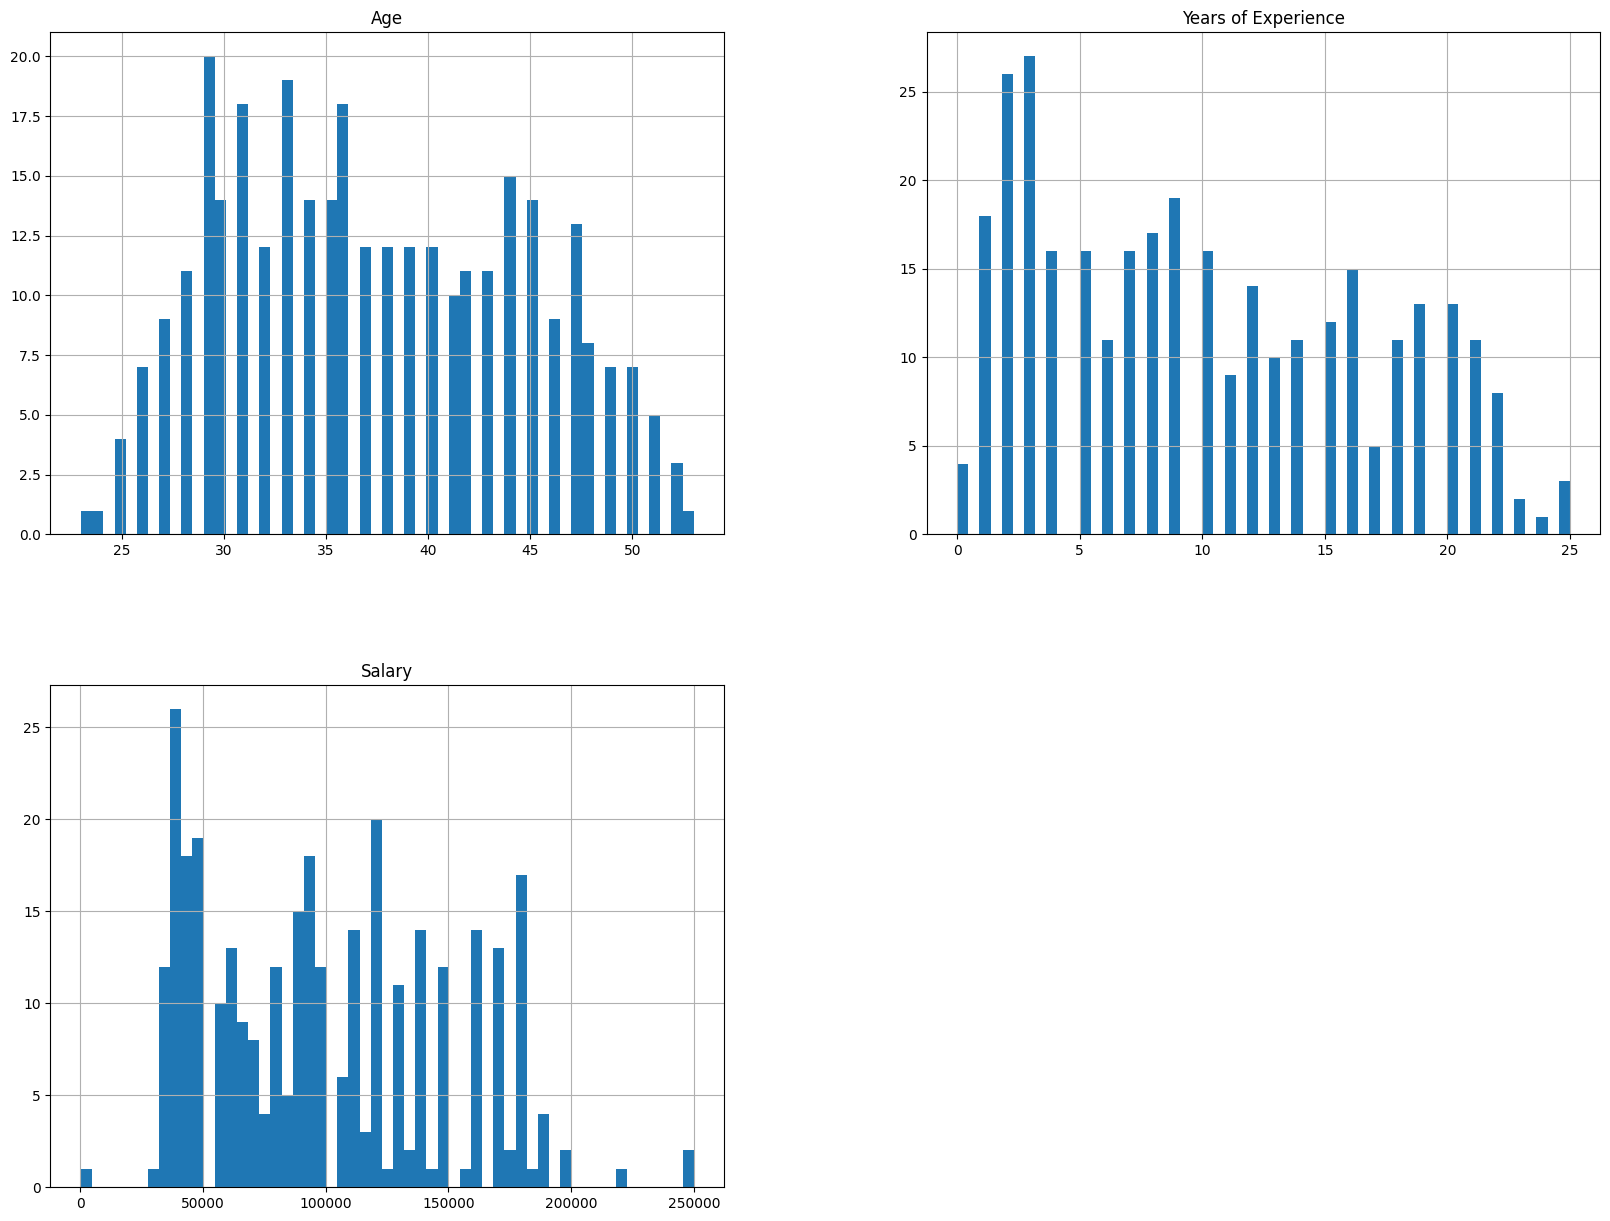

In [382]:
df.hist(bins=55, figsize=(20,15))
plt.show()

### 🏷️ Step 13: Label Encoding
Mengubah data kategorikal menjadi numerik dengan LabelEncoder dan menampilkan mapping-nya.

In [384]:
for column in categorical_features:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    print(f"Label mapping untuk '{column}': {le.classes_}")

Label mapping untuk 'Gender': ['Female' 'Male']
Label mapping untuk 'Education Level': ["Bachelor's" "Master's" 'PhD']
Label mapping untuk 'Job Title': ['Account Manager' 'Accountant' 'Administrative Assistant'
 'Business Analyst' 'Business Development Manager'
 'Business Intelligence Analyst' 'CEO' 'Chief Data Officer'
 'Chief Technology Officer' 'Content Marketing Manager' 'Copywriter'
 'Creative Director' 'Customer Service Manager' 'Customer Service Rep'
 'Customer Service Representative' 'Customer Success Manager'
 'Customer Success Rep' 'Data Analyst' 'Data Entry Clerk' 'Data Scientist'
 'Digital Content Producer' 'Digital Marketing Manager' 'Director'
 'Director of Business Development' 'Director of Engineering'
 'Director of Finance' 'Director of HR' 'Director of Human Capital'
 'Director of Human Resources' 'Director of Marketing'
 'Director of Operations' 'Director of Product Management'
 'Director of Sales' 'Director of Sales and Marketing' 'Event Coordinator'
 'Financial Adv

In [385]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,1,0,159,5,90000.0
1,28,0,1,17,3,65000.0
2,45,1,2,130,15,150000.0
3,36,0,0,101,7,60000.0
4,52,1,1,22,20,200000.0


### 🔗 Step 14: Heatmap Korelasi
Visualisasi korelasi antar fitur terhadap Salary. Membantu memilih fitur penting.

In [386]:
df.corr()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
Age,1.000000,-0.025034,0.540383,0.118619,0.979451,0.916543
Gender,-0.025034,1.000000,-0.024470,0.039072,-0.000761,0.075420
Education Level,0.540383,-0.024470,1.000000,0.113519,0.572589,0.661900
Job Title,0.118619,0.039072,0.113519,1.000000,0.106822,0.135939
Years of Experience,0.979451,-0.000761,0.572589,0.106822,1.000000,0.924669
Salary,0.916543,0.075420,0.661900,0.135939,0.924669,1.000000


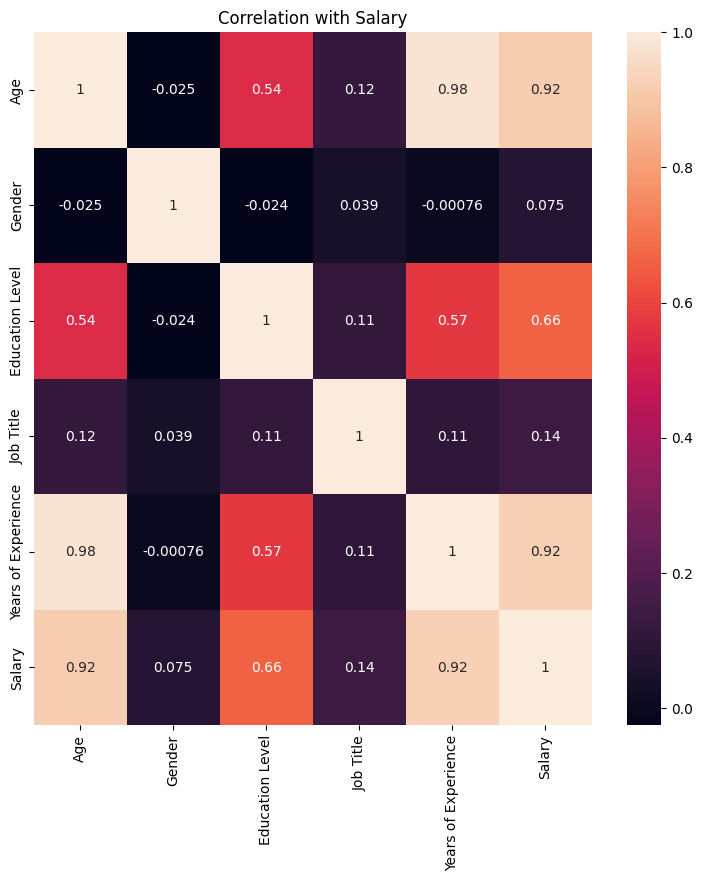

In [387]:
plt.figure(figsize=(9,9))
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.title("Correlation with Salary")
plt.show()

### ✂️ Step 15: Drop Gender & Split X-Y
Menghapus fitur `Gender`, memisahkan fitur (X) dan target (y).

In [388]:
df.drop(['Gender'],axis = 1,inplace = True)

In [389]:
x = df.drop('Salary',axis = 1)
y = df['Salary']

### 📤 Step 16: Split Data
Membagi dataset menjadi data training dan testing (80:20).

In [390]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [391]:
x_train

,Age,Education Level,Job Title,Years of Experience
73,28,0,166,2
182,44,2,155,15
17,39,2,116,12
24,41,1,37,13
146,42,2,115,16
...,...,...,...,...
189,28,0,66,1
71,39,0,98,11
106,30,0,20,3
284,35,0,119,9


In [401]:
y_train

,Salary
73,40000.0
182,145000.0
17,115000.0
24,140000.0
146,150000.0
...,...
189,35000.0
71,70000.0
106,50000.0
284,100000.0


### 🧪 Step 17: Standardisasi & Training XGBoost & Lasso
Menstandardisasi fitur dan melatih model XGBoost & Lasso.

In [392]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [393]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

In [394]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

### 📏 Step 18: Fungsi Evaluasi Model
Fungsi untuk menghitung dan mencetak metrik evaluasi: MAE, MSE, dan R².

In [395]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 {name} Performance:")
    print(f"🔹 MAE : {mae:.2f}")
    print(f"🔹 MSE : {mse:.2f}")
    print(f"🔹 R²  : {r2:.4f}")

# Evaluasi Lasso Regression
evaluate_model("Lasso Regression", y_test, y_pred_lasso)

# Evaluasi XGBoost Regressor
evaluate_model("XGBoost Regressor", y_test, y_pred_xgb)


📊 Lasso Regression Performance:
🔹 MAE : 11774.46
🔹 MSE : 246034125.37
🔹 R²  : 0.8698

📊 XGBoost Regressor Performance:
🔹 MAE : 9635.31
🔹 MSE : 174149213.84
🔹 R²  : 0.9078


### Step 19: Inference Model


In [396]:
# Mapping Education Level
education_map = {"Bachelor's": 0, "Master's": 1, 'PhD': 2}

# Mapping Job Title (ambil dari le.classes_)
job_title_map = {
    'Account Manager': 0,
    'Accountant': 1,
    'Administrative Assistant': 2,
    'Business Analyst': 3,
    'Business Development Manager': 4,
    'Business Intelligence Analyst': 5,
    'CEO': 6,
    'Chief Data Officer': 7,
    'Chief Technology Officer': 8,
    'Content Marketing Manager': 9,
    'Copywriter': 10,
    'Creative Director': 11,
    'Customer Service Manager': 12,
    'Customer Service Rep': 13,
    'Customer Service Representative': 14,
    'Customer Success Manager': 15,
    'Customer Success Rep': 16,
    'Data Analyst': 17,
    'Data Entry Clerk': 18,
    'Data Scientist': 19,
    'Digital Content Producer': 20,
    'Digital Marketing Manager': 21,
    'Director': 22,
    'Director of Business Development': 23,
    'Director of Engineering': 24,
    'Director of Finance': 25,
    'Director of HR': 26,
    'Director of Human Capital': 27,
    'Director of Human Resources': 28,
    'Director of Marketing': 29,
    'Director of Operations': 30,
    'Director of Product Management': 31,
    'Director of Sales': 32,
    'Director of Sales and Marketing': 33,
    'Event Coordinator': 34,
    'Financial Advisor': 35,
    'Financial Analyst': 36,
    'Financial Manager': 37,
    'Graphic Designer': 38,
    'HR Generalist': 39,
    'HR Manager': 40,
    'Help Desk Analyst': 41,
    'Human Resources Director': 42,
    'IT Manager': 43,
    'IT Support': 44,
    'IT Support Specialist': 45,
    'Junior Account Manager': 46,
    'Junior Accountant': 47,
    'Junior Advertising Coordinator': 48,
    'Junior Business Analyst': 49,
    'Junior Business Development Associate': 50,
    'Junior Business Operations Analyst': 51,
    'Junior Copywriter': 52,
    'Junior Customer Support Specialist': 53,
    'Junior Data Analyst': 54,
    'Junior Data Scientist': 55,
    'Junior Designer': 56,
    'Junior Developer': 57,
    'Junior Financial Advisor': 58,
    'Junior Financial Analyst': 59,
    'Junior HR Coordinator': 60,
    'Junior HR Generalist': 61,
    'Junior Marketing Analyst': 62,
    'Junior Marketing Coordinator': 63,
    'Junior Marketing Manager': 64,
    'Junior Marketing Specialist': 65,
    'Junior Operations Analyst': 66,
    'Junior Operations Coordinator': 67,
    'Junior Operations Manager': 68,
    'Junior Product Manager': 69,
    'Junior Project Manager': 70,
    'Junior Recruiter': 71,
    'Junior Research Scientist': 72,
    'Junior Sales Representative': 73,
    'Junior Social Media Manager': 74,
    'Junior Social Media Specialist': 75,
    'Junior Software Developer': 76,
    'Junior Software Engineer': 77,
    'Junior UX Designer': 78,
    'Junior Web Designer': 79,
    'Junior Web Developer': 80,
    'Marketing Analyst': 81,
    'Marketing Coordinator': 82,
    'Marketing Manager': 83,
    'Marketing Specialist': 84,
    'Network Engineer': 85,
    'Office Manager': 86,
    'Operations Analyst': 87,
    'Operations Director': 88,
    'Operations Manager': 89,
    'Principal Engineer': 90,
    'Principal Scientist': 91,
    'Product Designer': 92,
    'Product Manager': 93,
    'Product Marketing Manager': 94,
    'Project Engineer': 95,
    'Project Manager': 96,
    'Public Relations Manager': 97,
    'Recruiter': 98,
    'Research Director': 99,
    'Research Scientist': 100,
    'Sales Associate': 101,
    'Sales Director': 102,
    'Sales Executive': 103,
    'Sales Manager': 104,
    'Sales Operations Manager': 105,
    'Sales Representative': 106,
    'Senior Account Executive': 107,
    'Senior Account Manager': 108,
    'Senior Accountant': 109,
    'Senior Business Analyst': 110,
    'Senior Business Development Manager': 111,
    'Senior Consultant': 112,
    'Senior Data Analyst': 113,
    'Senior Data Engineer': 114,
    'Senior Data Scientist': 115,
    'Senior Engineer': 116,
    'Senior Financial Advisor': 117,
    'Senior Financial Analyst': 118,
    'Senior Financial Manager': 119,
    'Senior Graphic Designer': 120,
    'Senior HR Generalist': 121,
    'Senior HR Manager': 122,
    'Senior HR Specialist': 123,
    'Senior Human Resources Coordinator': 124,
    'Senior Human Resources Manager': 125,
    'Senior Human Resources Specialist': 126,
    'Senior IT Consultant': 127,
    'Senior IT Project Manager': 128,
    'Senior IT Support Specialist': 129,
    'Senior Manager': 130,
    'Senior Marketing Analyst': 131,
    'Senior Marketing Coordinator': 132,
    'Senior Marketing Director': 133,
    'Senior Marketing Manager': 134,
    'Senior Marketing Specialist': 135,
    'Senior Operations Analyst': 136,
    'Senior Operations Coordinator': 137,
    'Senior Operations Manager': 138,
    'Senior Product Designer': 139,
    'Senior Product Development Manager': 140,
    'Senior Product Manager': 141,
    'Senior Product Marketing Manager': 142,
    'Senior Project Coordinator': 143,
    'Senior Project Manager': 144,
    'Senior Quality Assurance Analyst': 145,
    'Senior Research Scientist': 146,
    'Senior Researcher': 147,
    'Senior Sales Manager': 148,
    'Senior Sales Representative': 149,
    'Senior Scientist': 150,
    'Senior Software Architect': 151,
    'Senior Software Developer': 152,
    'Senior Software Engineer': 153,
    'Senior Training Specialist': 154,
    'Senior UX Designer': 155,
    'Social Media Manager': 156,
    'Social Media Specialist': 157,
    'Software Developer': 158,
    'Software Engineer': 159,
    'Software Manager': 160,
    'Software Project Manager': 161,
    'Strategy Consultant': 162,
    'Supply Chain Analyst': 163,
    'Supply Chain Manager': 164,
    'Technical Recruiter': 165,
    'Technical Support Specialist': 166,
    'Technical Writer': 167,
    'Training Specialist': 168,
    'UX Designer': 169,
    'UX Researcher': 170,
    'VP of Finance': 171,
    'VP of Operations': 172,
    'Web Developer': 173
}


In [397]:
def predict_salary_inference(age, education_level, job_title, years_exp, model, scaler):
    education_map = {"Bachelor's": 0, "Master's": 1, 'PhD': 2}

    try:
        edu_encoded = education_map[education_level]
        job_encoded = job_title_map[job_title]
    except KeyError as e:
        return f"❌ Input tidak valid: {e}"

    input_data = [[
        age,
        edu_encoded,
        job_encoded,
        years_exp
    ]]

    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0]

    return f"💰 Prediksi Gaji: ${prediction:,.2f}"


In [398]:
predict_salary_inference(
    age=30,
    education_level="Master's",
    job_title="Senior Data Scientist",
    years_exp=5,
    model=lasso,
    scaler=scaler
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'💰 Prediksi Gaji: $73,010.05'

In [399]:
predict_salary_inference(
    age=30,
    education_level="Master's",
    job_title="Senior Data Scientist",
    years_exp=5,
    model=xgb_model,
    scaler=scaler
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'💰 Prediksi Gaji: $71,741.61'

### Step 20: Save Model


In [400]:
# --- SAVE MODEL CODE ---
import joblib

joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(lasso, 'lasso.pkl')
joblib.dump(scaler, 'scaler.pkl')

import json

with open('education_map.json', 'w') as f:
    json.dump({"Bachelor's": 0, "Master's": 1, "PhD": 2}, f)

with open('job_title_map.json', 'w') as f:
    json.dump(job_title_map, f)